In [316]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

*Hello again. Now we have to convert the series to steady-state, as we did in EDA, and then we will build a model, run a pipeline and train the model on this data and make predictions.*

# Data

In [317]:
data = pd.read_csv('data/Microsoft_Stock.csv')

In [318]:
data['Date'] = pd.to_datetime(pd.to_datetime(data['Date']).dt.date)

In [319]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [320]:
data

,Date,Open,High,Low,Close,Volume,year,month,day
0,2015-04-01,40.60,40.76,40.31,40.72,36865322,2015,4,1
1,2015-04-02,40.66,40.74,40.12,40.29,37487476,2015,4,2
2,2015-04-06,40.34,41.78,40.18,41.55,39223692,2015,4,6
3,2015-04-07,41.61,41.91,41.31,41.53,28809375,2015,4,7
4,2015-04-08,41.48,41.69,41.04,41.42,24753438,2015,4,8
...,...,...,...,...,...,...,...,...,...
1506,2021-03-25,235.30,236.94,231.57,232.34,34061853,2021,3,25
1507,2021-03-26,231.55,236.71,231.55,236.48,25479853,2021,3,26
1508,2021-03-29,236.59,236.80,231.88,235.24,25227455,2021,3,29
1509,2021-03-30,233.53,233.85,231.10,231.85,24792012,2021,3,30


In [321]:
data.set_index('Date', inplace=True)

In [322]:
data_stat = data.copy()

In [323]:
data_stat[['Close', 'Open', 'High', 'Low']] = data[['Close', 'Open', 'High', 'Low']].diff().dropna()

In [324]:
data_stat

,Open,High,Low,Close,Volume,year,month,day
Date,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,36865322,2015,4,1
2015-04-02,0.06,-0.02,-0.19,-0.43,37487476,2015,4,2
2015-04-06,-0.32,1.04,0.06,1.26,39223692,2015,4,6
2015-04-07,1.27,0.13,1.13,-0.02,28809375,2015,4,7
2015-04-08,-0.13,-0.22,-0.27,-0.11,24753438,2015,4,8
...,...,...,...,...,...,...,...,...
2021-03-25,-2.55,-1.06,-3.75,-3.12,34061853,2021,3,25
2021-03-26,-3.75,-0.23,-0.02,4.14,25479853,2021,3,26
2021-03-29,5.04,0.09,0.33,-1.24,25227455,2021,3,29


In [325]:
data_stat.isna().sum()

Open      1
High      1
Low       1
Close     1
Volume    0
year      0
month     0
day       0
dtype: int64

In [326]:
data_stat.dropna(inplace=True)

# Models

## XGBRegressor

In [327]:
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [328]:
cat_data = ['year', 'month', 'day']
num_data = ['Open', 'High', 'Low', 'Volume']

In [329]:
cat_feach = gen_features(
    columns = [[x] for x in cat_data],
    classes=[OneHotEncoder]
)

num_feach = gen_features(
    columns= [[x] for x in num_data],
    classes=None
)

mapper = DataFrameMapper(
    cat_feach + num_feach,
    df_out=True,  
    default=None 
)

In [330]:
X, y = data.drop('Close', axis=1), data['Close']

In [331]:
data_stat = mapper.fit_transform(data_stat)

In [332]:
data_stat.head(5)

,year_0,year_1,year_2,year_3,year_4,year_5,year_6,month_0,month_1,month_2,...,day_26,day_27,day_28,day_29,day_30,Open,High,Low,Volume,Close
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.06,-0.02,-0.19,37487476,-0.43
2015-04-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.32,1.04,0.06,39223692,1.26
2015-04-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.27,0.13,1.13,28809375,-0.02
2015-04-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.13,-0.22,-0.27,24753438,-0.11
2015-04-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.23,-0.07,0.21,25723861,0.06


In [333]:
train_xg = data_stat.loc[data_stat.index < '01-01-2020'] 
test_xg = data_stat.loc[data_stat.index >= '01-01-2020'] 

In [334]:
x_train = train_xg.drop('Close', axis=1)
y_train = train_xg['Close']
x_test = test_xg.drop('Close', axis=1)
y_test = test_xg['Close']

In [335]:
from xgboost import XGBRegressor

In [336]:
tscv = TimeSeriesSplit(n_splits=5)

In [337]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 15],
    'learning_rate': [0.01, 0.1]
}

XGB_reg = GridSearchCV(estimator=XGBRegressor(), refit=True, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv, verbose=3, n_jobs=-1)
XGB_reg.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=3)

In [338]:
XGB_reg.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [339]:
XGB_reg.score(x_train, y_train)

-0.07989296129302906

In [340]:
y_pred = XGB_reg.predict(x_test)

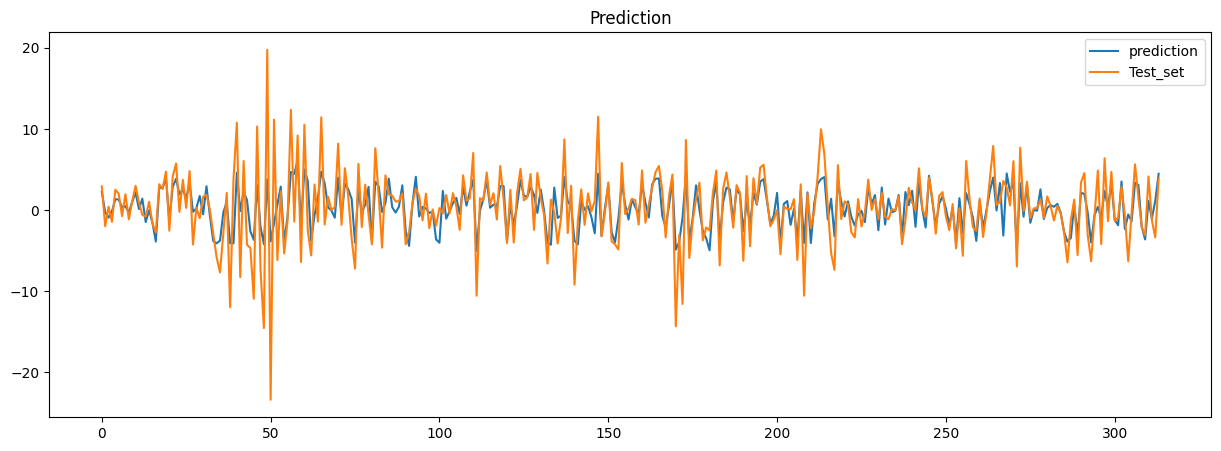

In [341]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(y_pred)
plt.plot(y_test.values)
plt.legend(['prediction', 'Test_set'])
plt.title('Prediction')
plt.show()

In [342]:
from sklearn.metrics import mean_squared_error

In [343]:
np.square(mean_squared_error(y_pred, y_test))

105.6260310784836

The error in the data is quite low, which indicates an excellent forecast.

In [344]:
initial_value  = data['Close'].loc[data.index >= '01-01-2020']

In [345]:
initial_value = initial_value + y_pred

In [346]:
initial_value

Date
2020-01-02    162.855379
2020-01-03    158.354683
2020-01-06    158.098030
2020-01-07    157.407685
2020-01-08    161.426612
                 ...    
2021-03-25    228.707479
2021-03-26    237.608949
2021-03-29    234.188149
2021-03-30    232.983229
2021-03-31    240.239066
Name: Close, Length: 314, dtype: float64

In [358]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Оригінальні дані',
                         line=dict(color='red', width=3)))

fig.add_trace(go.Scatter(x=initial_value.index, y=initial_value.values, mode='lines', name='Прогноз',
                         line=dict(color='blue', width=2), opacity=0.6))

fig.update_layout(
    title='Прогнозування даних з відновленням тренду',
    xaxis_title='Дата',
    yaxis_title='Ціна',
    legend_title='Легенда',
    width=1600,
    height=1000
)

fig.show()


As we can see, the error in these forecasts is not large, so I think we did a great job.